In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv
/kaggle/input/playground-series-s3e2/sample_submission.csv
/kaggle/input/playground-series-s3e2/train.csv
/kaggle/input/playground-series-s3e2/test.csv


In [53]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer

train_data = pd.read_csv("/kaggle/input/playground-series-s3e2/train.csv")

homework_data = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

test_data = pd.read_csv("/kaggle/input/playground-series-s3e2/test.csv")

merged_data = pd.concat([train_data, homework_data], ignore_index=True)

imputer = SimpleImputer(strategy="most_frequent")
merged_data_filled = imputer.fit_transform(merged_data)

merged_df = pd.DataFrame(merged_data_filled, columns=merged_data.columns)

X = pd.concat([merged_df, test_data], ignore_index=True)

X_encoded = pd.get_dummies(X, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"])

train_X = X_encoded[X_encoded["stroke"].notnull()]
train_y = train_X["stroke"].astype(int)
train_X = train_X.drop("stroke", axis=1)

test_X = X_encoded[X_encoded["stroke"].isnull()]
test_X = test_X.drop("stroke", axis=1)

clf = HistGradientBoostingClassifier()

clf.fit(train_X, train_y)

predictions = clf.predict_proba(test_X)[:, 1]

output = pd.DataFrame({
    "id": test_data["id"],
    "stroke": predictions
})

output.to_csv("predictions.csv", index=False)
print(output)
import pandas as pd

predictions = pd.read_csv("predictions.csv")

threshold = predictions["stroke"].mean()

risk_persons = predictions[predictions["stroke"] > threshold]

risk_analysis = pd.DataFrame({
    "id": risk_persons["id"],
    "Risk Probability": risk_persons["stroke"]
})

risk_analysis.insert(0, "Threshold", threshold)

risk_analysis.to_csv("risk_analysis.csv", index=False)


          id    stroke
0      15304  0.061605
1      15305  0.151077
2      15306  0.001055
3      15307  0.081150
4      15308  0.016932
...      ...       ...
10199  25503  0.001055
10200  25504  0.010252
10201  25505  0.001055
10202  25506  0.002628
10203  25507  0.001055

[10204 rows x 2 columns]


In [54]:
import pandas as pd

threshold = output["stroke"].mean()

risk_persons = output[output["stroke"] > threshold]

risk_analysis = pd.DataFrame({
    "id": risk_persons["id"],
    "Risk Probability": risk_persons["stroke"]
})

risk_analysis.insert(0, "Threshold", threshold)


table_output = risk_analysis.to_string(index=False)


print(table_output)


 Threshold    id  Risk Probability
  0.033157 15304          0.061605
  0.033157 15305          0.151077
  0.033157 15307          0.081150
  0.033157 15311          0.049797
  0.033157 15315          0.056766
  0.033157 15323          0.050195
  0.033157 15334          0.144452
  0.033157 15337          0.083137
  0.033157 15338          0.052138
  0.033157 15340          0.226013
  0.033157 15341          0.070185
  0.033157 15347          0.056996
  0.033157 15350          0.044894
  0.033157 15352          0.217738
  0.033157 15358          0.097374
  0.033157 15360          0.036325
  0.033157 15368          0.067887
  0.033157 15370          0.048346
  0.033157 15379          0.309941
  0.033157 15382          0.165751
  0.033157 15385          0.044966
  0.033157 15387          0.094681
  0.033157 15389          0.057261
  0.033157 15390          0.036425
  0.033157 15391          0.060822
  0.033157 15394          0.276332
  0.033157 15397          0.036852
  0.033157 15401    

In [55]:
import pandas as pd

risk_analysis = pd.read_csv("risk_analysis.csv")
homework = pd.read_csv("/kaggle/input/playground-series-s3e2/test.csv")

merged_data = pd.merge(risk_analysis, homework, on="id", how="inner")

merged_data.to_csv("homework2.csv", index=False)
table_output = merged_data.to_string(index=False)


print(table_output)


 Threshold    id  Risk Probability gender  age  hypertension  heart_disease ever_married     work_type Residence_type  avg_glucose_level   bmi  smoking_status
  0.033157 15304          0.061605 Female 57.0             0              0          Yes       Private          Rural              82.54 33.40         Unknown
  0.033157 15305          0.151077   Male 70.0             1              0          Yes       Private          Urban              72.06 28.50         Unknown
  0.033157 15307          0.081150 Female 56.0             0              0          Yes      Govt_job          Urban              69.24 41.40          smokes
  0.033157 15311          0.049797 Female 52.0             0              1          Yes      Govt_job          Rural             103.12 31.60 formerly smoked
  0.033157 15315          0.056766   Male 64.0             0              0          Yes      Govt_job          Rural             206.66 44.80    never smoked
  0.033157 15323          0.050195 Female 53.0

65.75452372823489
Number of people who match the criteria: 1310
Number of people who not match the criteria: 1619
IDs of people who match the criteria:
15305
15334
15337
15340
15352
15358
15368
15382
15387
15408
15411
15416
15441
15447
15460
15471
15484
15489
15497
15498
15504
15506
15508
15509
15529
15536
15545
15546
15548
15549
15559
15566
15571
15577
15578
15585
15590
15607
15618
15626
15630
15634
15635
15637
15646
15652
15658
15672
15676
15680
15690
15691
15697
15714
15719
15723
15726
15730
15731
15745
15750
15753
15762
15765
15767
15769
15776
15777
15787
15788
15797
15800
15805
15826
15835
15842
15843
15847
15849
15865
15867
15877
15883
15889
15917
15924
15956
15959
15974
15980
15985
16002
16014
16016
16018
16020
16059
16064
16098
16105
16118
16128
16142
16164
16166
16169
16173
16178
16180
16188
16192
16195
16208
16209
16216
16218
16242
16249
16252
16253
16255
16266
16267
16270
16271
16277
16288
16295
16318
16320
16333
16341
16343
16344
16348
16349
16350
16378
16389
16395
16405
16

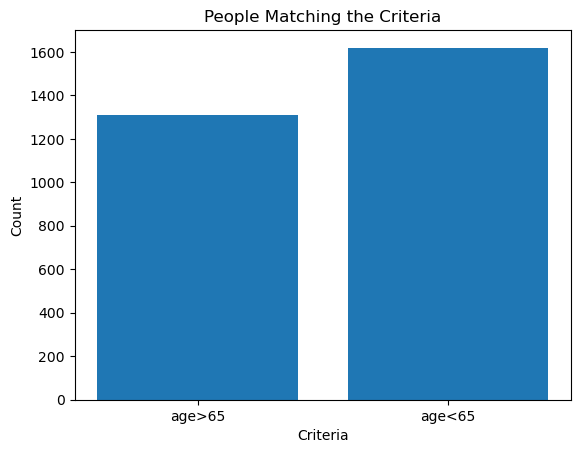

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('homework2.csv')
print(df['age'].mean())
cross_query = df[(df['age'] > 65.44337748344371) ]
cross_query2 = df[(df['age'] < 65.44337748344371) ]


count = len(cross_query)
count2= len(cross_query2)


print("Number of people who match the criteria:", count)
print("Number of people who not match the criteria:",count2)

if count > 0:
    print("IDs of people who match the criteria:")
    for id in cross_query['id']:
        print(id)

labels = ['age>65', 'age<65']
values = [count, count2]

plt.bar(labels, values)
plt.xlabel('Criteria')
plt.ylabel('Count')
plt.title('People Matching the Criteria')
plt.show()

Number of people who match the criteria: 1143
Number of people who do not match the criteria: 1786
IDs of people who match the criteria:
15305
15315
15334
15347
15352
15358
15379
15389
15390
15394
15412
15419
15435
15438
15446
15462
15470
15484
15486
15490
15510
15513
15522
15525
15526
15529
15530
15532
15545
15546
15549
15555
15559
15582
15595
15601
15603
15604
15605
15607
15610
15626
15635
15646
15663
15680
15681
15688
15699
15706
15719
15728
15729
15731
15750
15756
15762
15766
15769
15805
15806
15864
15867
15868
15869
15878
15879
15882
15915
15917
15952
15956
15974
15976
15977
15980
15989
16014
16016
16025
16055
16075
16125
16128
16142
16144
16152
16182
16192
16195
16200
16205
16213
16220
16222
16242
16252
16255
16256
16264
16269
16271
16277
16288
16295
16328
16340
16341
16343
16348
16350
16361
16365
16370
16375
16394
16402
16429
16437
16450
16451
16460
16478
16489
16491
16506
16508
16520
16550
16554
16566
16573
16590
16597
16600
16606
16617
16619
16629
16633
16639
16643
16644
16647

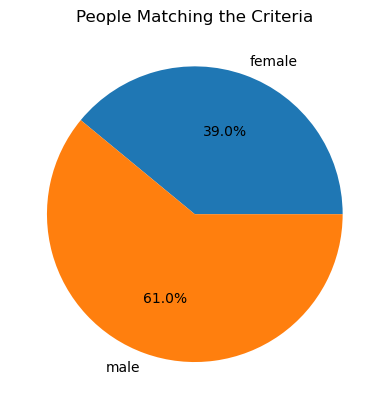

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('homework2.csv')

cross_query = df[(df['gender'] > 'Female')]
cross_query2 = df[(df['gender'] < 'Male')]

count = len(cross_query)
count2 = len(cross_query2)

print("Number of people who match the criteria:", count)
print("Number of people who do not match the criteria:", count2)

if count > 0:
    print("IDs of people who match the criteria:")
    for id in cross_query['id']:
        print(id)

labels = ['female', 'male']
values = [count, count2]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('People Matching the Criteria')
plt.show()


Number of people who match the criteria: 1266
Number of people who do not match the criteria: 1663
IDs of people who match the criteria:
15304
15307
15311
15315
15337
15338
15340
15347
15358
15360
15368
15379
15387
15389
15390
15394
15397
15412
15416
15417
15419
15429
15438
15441
15445
15446
15460
15464
15465
15471
15479
15484
15487
15490
15491
15497
15502
15508
15509
15511
15513
15522
15525
15526
15532
15533
15544
15555
15570
15576
15582
15585
15594
15599
15601
15603
15613
15630
15635
15646
15652
15663
15670
15676
15690
15699
15716
15718
15726
15728
15731
15750
15754
15756
15766
15767
15768
15776
15781
15787
15788
15790
15794
15796
15805
15806
15816
15826
15832
15838
15839
15841
15849
15860
15864
15870
15871
15875
15877
15878
15879
15882
15883
15900
15901
15907
15910
15912
15930
15939
15956
15959
15972
15977
16002
16010
16014
16016
16025
16027
16046
16052
16059
16075
16082
16098
16129
16137
16142
16148
16152
16153
16164
16166
16178
16195
16200
16205
16213
16215
16216
16220
16238
16242

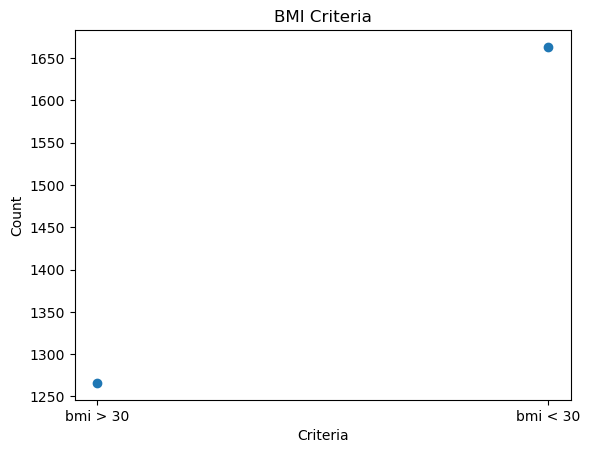

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('homework2.csv')

cross_query = df[df['bmi'] > 30.14330132450331]
cross_query2 = df[df['bmi'] < 30.14330132450331]

count = len(cross_query)
count2 = len(cross_query2)

print("Number of people who match the criteria:", count)
print("Number of people who do not match the criteria:", count2)

if count > 0:
    print("IDs of people who match the criteria:")
    for id in cross_query['id']:
        print(id)

labels = ['bmi > 30', 'bmi < 30']
values = [count, count2]

plt.scatter(labels, values)
plt.xlabel('Criteria')
plt.ylabel('Count')
plt.title('BMI Criteria')
plt.show()


96.25811198361215
Number of people who match the criteria: 967
Number of people who not match the criteria: 1962
IDs of people who match the criteria:
15311
15315
15334
15341
15358
15360
15379
15382
15385
15394
15406
15408
15411
15412
15416
15417
15429
15438
15445
15446
15453
15462
15465
15484
15486
15497
15498
15504
15511
15522
15532
15567
15590
15595
15610
15626
15630
15634
15635
15646
15658
15663
15672
15676
15686
15691
15692
15697
15699
15719
15728
15730
15748
15753
15765
15766
15767
15769
15776
15777
15781
15787
15790
15797
15800
15847
15849
15860
15864
15867
15879
15882
15900
15901
15917
15924
15930
15931
15974
15985
15997
16002
16010
16027
16037
16046
16055
16072
16097
16105
16118
16125
16129
16137
16150
16164
16173
16180
16200
16218
16238
16256
16266
16271
16288
16298
16314
16324
16332
16333
16340
16343
16344
16352
16355
16370
16405
16406
16413
16421
16423
16441
16450
16458
16468
16469
16480
16486
16489
16491
16516
16557
16561
16566
16570
16590
16591
16606
16624
16629
16647
166

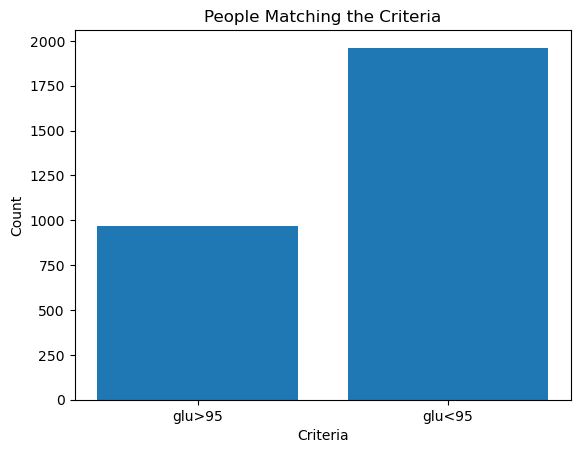

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('homework2.csv')
print(df['avg_glucose_level'].mean())
cross_query = df[(df['avg_glucose_level'] > 95.57500662251657) ]
cross_query2 = df[(df['avg_glucose_level'] < 95.57500662251657) ]


count = len(cross_query)
count2= len(cross_query2)


print("Number of people who match the criteria:", count)
print("Number of people who not match the criteria:",count2)

if count > 0:
    print("IDs of people who match the criteria:")
    for id in cross_query['id']:
        print(id)

labels = ['glu>95', 'glu<95']
values = [count, count2]

plt.bar(labels, values)
plt.xlabel('Criteria')
plt.ylabel('Count')
plt.title('People Matching the Criteria')
plt.show()

Number of people who match the criteria: 198
Number of people who do not match the criteria: 2731
IDs of people who match the criteria:
15311
15379
15394
15489
15529
15690
15762
15769
15826
15838
16002
16079
16097
16192
16216
16218
16256
16295
16324
16328
16333
16343
16458
16478
16617
16679
16691
16693
16740
16751
16779
16792
16832
16852
16866
16891
16960
17025
17152
17239
17244
17256
17385
17387
17401
17519
17521
17562
17672
17811
18030
18168
18212
18307
18308
18458
18470
18520
18580
18640
18709
18770
18786
18829
18879
18944
18987
19098
19153
19157
19179
19196
19197
19198
19231
19318
19341
19448
19466
19473
19479
19575
19577
19738
19763
19888
19938
19957
19995
20133
20173
20186
20229
20258
20260
20337
20349
20352
20365
20381
20421
20472
20504
20575
20589
20603
20682
20733
20777
20793
20834
20842
20912
20995
21011
21148
21277
21430
21507
21519
21567
21588
21617
21651
21706
21730
21832
21843
21872
21888
21949
21956
22023
22175
22244
22267
22281
22313
22765
22829
22932
22979
23045
23050


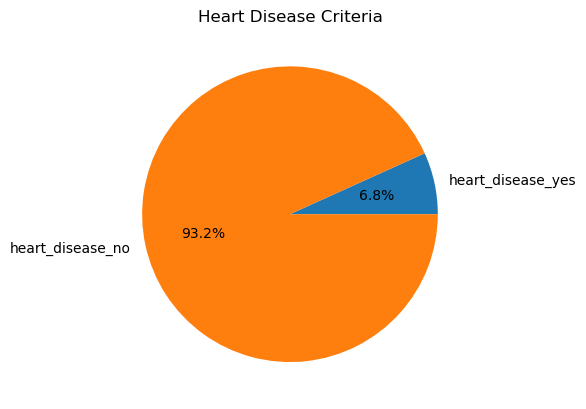

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('homework2.csv')

cross_query = df[df['heart_disease'] == 1]
cross_query2 = df[df['heart_disease'] == 0]

count = len(cross_query)
count2 = len(cross_query2)

print("Number of people who match the criteria:", count)
print("Number of people who do not match the criteria:", count2)

if count > 0:
    print("IDs of people who match the criteria:")
    for id in cross_query['id']:
        print(id)

labels = ['heart_disease_yes', 'heart_disease_no']
values = [count, count2]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Heart Disease Criteria')
plt.show()


0.13690679412768864
Number of people who match the criteria: 401
Number of people who not match the criteria: 2528
IDs of people who match the criteria:
15305
15370
15382
15394
15405
15416
15419
15471
15529
15546
15555
15595
15603
15618
15630
15663
15691
15714
15719
15745
15756
15766
15787
15882
15889
15917
15924
15985
16046
16164
16173
16178
16195
16200
16208
16209
16213
16215
16218
16242
16253
16271
16301
16318
16328
16341
16348
16373
16378
16413
16417
16480
16486
16540
16590
16594
16597
16629
16643
16662
16668
16691
16730
16740
16873
16938
16948
16998
17025
17034
17043
17106
17116
17146
17176
17277
17284
17299
17321
17372
17443
17450
17474
17480
17503
17519
17559
17560
17633
17736
17750
17775
17797
17811
17813
17821
17893
17907
17916
17962
17995
18033
18035
18061
18067
18127
18130
18138
18172
18177
18205
18215
18234
18241
18248
18278
18287
18402
18414
18577
18594
18599
18632
18675
18686
18709
18732
18786
18811
18819
18840
18862
18976
18987
18993
19025
19060
19112
19147
19196
19218
1

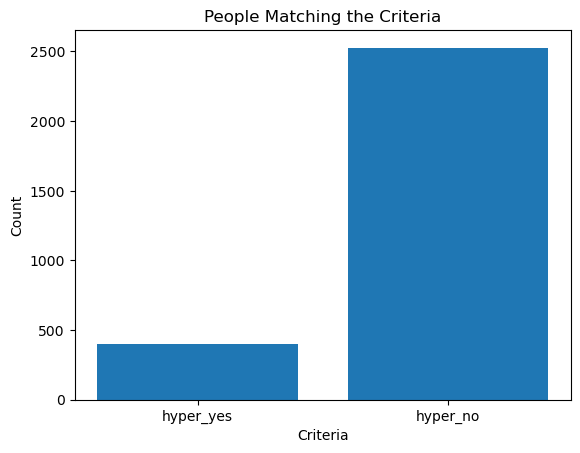

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('homework2.csv')
print(df['hypertension'].mean())
cross_query = df[(df['hypertension'] == 1) ]
cross_query2 = df[(df['hypertension'] == 0) ]


count = len(cross_query)
count2= len(cross_query2)


print("Number of people who match the criteria:", count)
print("Number of people who not match the criteria:",count2)

if count > 0:
    print("IDs of people who match the criteria:")
    for id in cross_query['id']:
        print(id)

labels = ['hyper_yes', 'hyper_no']
values = [count, count2]

plt.bar(labels, values)
plt.xlabel('Criteria')
plt.ylabel('Count')
plt.title('People Matching the Criteria')
plt.show()

Number of people who match the criteria: 2775
Number of people who not match the criteria: 154
IDs of people who match the criteria:
15304
15305
15307
15311
15315
15323
15334
15337
15338
15340
15347
15350
15352
15358
15360
15368
15370
15379
15382
15385
15389
15390
15391
15394
15397
15401
15405
15406
15407
15408
15410
15411
15412
15416
15417
15419
15429
15435
15438
15441
15445
15446
15447
15452
15453
15462
15465
15470
15471
15479
15482
15484
15486
15487
15489
15490
15491
15497
15498
15502
15504
15506
15508
15509
15510
15511
15512
15513
15522
15525
15526
15529
15530
15532
15533
15536
15537
15544
15545
15546
15548
15549
15555
15559
15566
15567
15570
15571
15576
15577
15582
15585
15590
15594
15595
15599
15601
15603
15604
15605
15607
15610
15613
15618
15626
15630
15634
15635
15637
15641
15646
15652
15658
15663
15670
15672
15676
15680
15681
15686
15688
15690
15691
15697
15699
15706
15714
15716
15718
15719
15721
15723
15726
15727
15728
15729
15730
15731
15735
15745
15748
15750
15753
15754
157

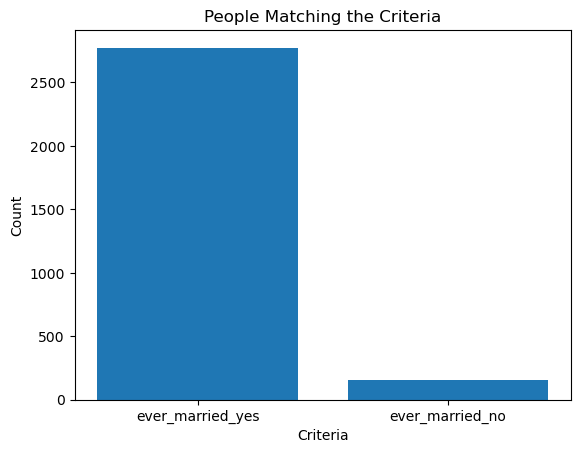

In [62]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('homework2.csv')


cross_query = df[(df['ever_married'] == 'Yes') ]
cross_query2 = df[(df['ever_married'] == 'No') ]



count = len(cross_query)
count2= len(cross_query2)


print("Number of people who match the criteria:", count)
print("Number of people who not match the criteria:",count2)

if count > 0:
    print("IDs of people who match the criteria:")
    for id in cross_query['id']:
        print(id)

labels = ['ever_married_yes', 'ever_married_no']
values = [count, count2]

plt.bar(labels, values)
plt.xlabel('Criteria')
plt.ylabel('Count')
plt.title('People Matching the Criteria')
plt.show()

Number of people who match the criteria: 1515
Number of people who not match the criteria: 1414
IDs of people who match the criteria:
15305
15307
15334
15337
15338
15341
15350
15358
15360
15368
15379
15389
15391
15401
15405
15406
15410
15411
15412
15435
15438
15441
15445
15446
15447
15452
15453
15464
15465
15479
15482
15484
15490
15497
15502
15510
15511
15513
15522
15525
15526
15529
15530
15533
15537
15544
15546
15549
15555
15559
15566
15570
15576
15599
15601
15603
15604
15607
15610
15630
15637
15646
15652
15658
15672
15681
15690
15697
15714
15716
15718
15719
15721
15723
15726
15729
15735
15745
15750
15765
15766
15767
15768
15769
15777
15781
15787
15788
15789
15797
15805
15816
15832
15835
15838
15847
15849
15864
15865
15867
15870
15875
15882
15883
15889
15890
15900
15907
15915
15917
15931
15959
15972
15977
15985
15989
15997
16002
16014
16016
16018
16027
16043
16046
16072
16075
16079
16082
16098
16112
16118
16137
16148
16150
16164
16166
16173
16180
16182
16197
16198
16216
16222
16249
16

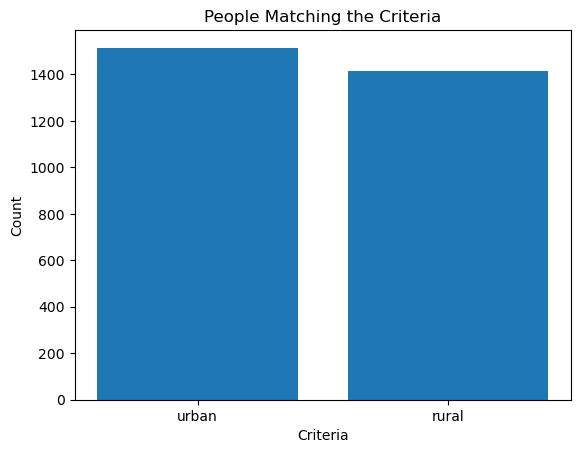

In [63]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('homework2.csv')


cross_query = df[(df['Residence_type'] == 'Urban') ]
cross_query2 = df[(df['Residence_type'] == 'Rural') ]



count = len(cross_query)
count2= len(cross_query2)


print("Number of people who match the criteria:", count)
print("Number of people who not match the criteria:",count2)

if count > 0:
    print("IDs of people who match the criteria:")
    for id in cross_query['id']:
        print(id)


labels = ['urban', 'rural']
values = [count, count2]

plt.bar(labels, values)
plt.xlabel('Criteria')
plt.ylabel('Count')
plt.title('People Matching the Criteria')
plt.show()

Number of people who match the criteria: 481
Number of people who match the criteria: 1263
Number of people who match the criteria: 473
Number of people who match the criteria: 712
IDs of people who match the criteria:
15307
15323
15338
15347
15429
15446
15452
15479
15491
15497
15522
15537
15555
15670
15672
15688
15692
15727
15731
15769
15777
15796
15803
15816
15841
15842
15864
15865
15870
15871
15875
15882
15910
16020
16064
16079
16148
16150
16152
16164
16197
16198
16222
16251
16269
16298
16336
16340
16373
16413
16415
16417
16433
16460
16508
16520
16530
16575
16585
16619
16623
16644
16661
16664
16679
16693
16702
16705
16730
16743
16744
16806
16832
16857
16909
16919
16979
16982
16985
16996
17056
17068
17114
17128
17136
17146
17175
17198
17262
17266
17272
17287
17299
17326
17352
17384
17401
17424
17430
17450
17467
17476
17502
17521
17523
17533
17562
17564
17599
17636
17643
17672
17693
17720
17721
17724
17728
17736
17819
17888
17893
17903
17910
17926
17930
17951
17976
18028
18059
18061
1

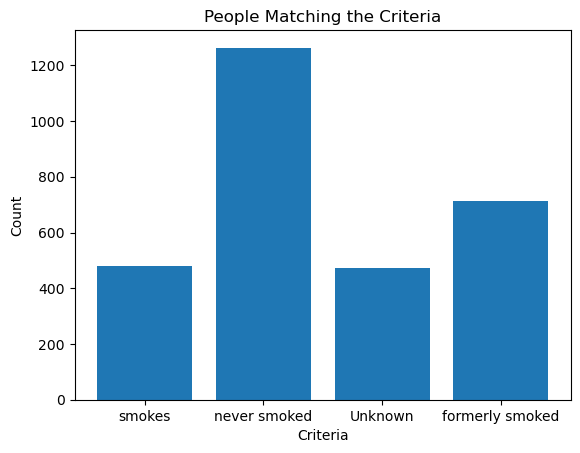

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('homework2.csv')

cross_query = df[(df['smoking_status'] == 'smokes') ]
cross_query2 = df[(df['smoking_status'] == 'never smoked') ]
cross_query3 = df[(df['smoking_status'] == 'Unknown') ]
cross_query4 = df[(df['smoking_status'] == 'formerly smoked') ]





count = len(cross_query)
count2 = len(cross_query2)
count3 = len(cross_query3)
count4 = len(cross_query4)

print("Number of people who match the criteria:", count)
print("Number of people who match the criteria:", count2)
print("Number of people who match the criteria:", count3)
print("Number of people who match the criteria:", count4)


if count > 0:
    print("IDs of people who match the criteria:")
    for id in cross_query['id']:
        print(id)


labels = ['smokes', 'never smoked','Unknown','formerly smoked']
values = [count, count2,count3,count4]

plt.bar(labels, values)
plt.xlabel('Criteria')
plt.ylabel('Count')
plt.title('People Matching the Criteria')
plt.show()

Number of people who match the criteria: 1827
Number of people who match the criteria: 385
Number of people who match the criteria: 717
Number of people who match the criteria: 0
IDs of people who match the criteria:
15304
15305
15323
15334
15337
15338
15347
15350
15370
15379
15382
15385
15389
15391
15401
15405
15406
15407
15410
15411
15412
15416
15417
15419
15429
15435
15438
15441
15452
15453
15462
15464
15470
15471
15479
15484
15487
15489
15490
15491
15498
15502
15509
15510
15511
15512
15513
15536
15537
15545
15546
15548
15549
15555
15567
15570
15571
15576
15577
15585
15594
15599
15601
15604
15605
15613
15626
15635
15641
15663
15670
15672
15676
15686
15688
15690
15691
15692
15699
15714
15718
15719
15721
15726
15727
15728
15729
15730
15750
15765
15766
15776
15777
15781
15787
15788
15789
15790
15793
15794
15803
15806
15832
15838
15839
15847
15864
15865
15867
15868
15869
15870
15871
15872
15875
15877
15878
15879
15882
15883
15889
15900
15901
15907
15910
15912
15915
15924
15931
15939
159

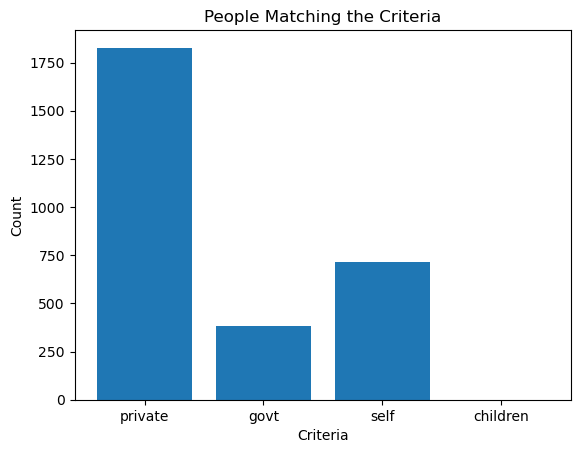

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('homework2.csv')

cross_query = df[(df['work_type'] == 'Private') ]
cross_query2 = df[(df['work_type'] == 'Govt_job') ]
cross_query3 = df[(df['work_type'] == 'Self-employed') ]
cross_query4 = df[(df['work_type'] == 'children') ]





count = len(cross_query)
count2 = len(cross_query2)
count3 = len(cross_query3)
count4 = len(cross_query4)

print("Number of people who match the criteria:", count)
print("Number of people who match the criteria:", count2)
print("Number of people who match the criteria:", count3)
print("Number of people who match the criteria:", count4)


if count > 0:
    print("IDs of people who match the criteria:")
    for id in cross_query['id']:
        print(id)


labels = ['private', 'govt','self','children']
values = [count, count2,count3,count4]

plt.bar(labels, values)
plt.xlabel('Criteria')
plt.ylabel('Count')
plt.title('People Matching the Criteria')
plt.show()